In [56]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras as ks



In [57]:
dataset = pd.read_csv('sensor.csv')
dataset.head()

,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,1/2/2023 0:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,1/2/2023 0:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,1/2/2023 0:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,1/2/2023 0:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,1/2/2023 0:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0


In [58]:
# Find NAN
nan_df = dataset[dataset.isna().any(axis=1)]
display(nan_df.head())

,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious


In [59]:
dataset = dataset.dropna(how='all')
dataset.head()

,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,1/2/2023 0:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,1/2/2023 0:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,1/2/2023 0:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,1/2/2023 0:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,1/2/2023 0:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0


In [60]:
#Get rid of text in order date column
dataset = dataset[dataset['Timestamp'].str[0:2]!='Or']




In [85]:
df = pd.DataFrame(dataset)
#dataset['Timestamp'] = pd.to_numeric(dataset['Timestamp'])
#dataset['IP_Address'] = pd.to_numeric(dataset['IP_Address'])
df= df.IP_Address.str.replace('.', '').astype(float)

dataset['Packet_Rate'] = pd.to_numeric(dataset['Packet_Rate'])
dataset['Packet_Drop_Rate'] = pd.to_numeric(dataset['Packet_Drop_Rate'])
dataset['Packet_Duplication_Rate'] = pd.to_numeric(dataset['Data_Throughput'])
dataset['Signal_Strength'] = pd.to_numeric(dataset['Signal_Strength'])
dataset['SNR'] = pd.to_numeric(dataset['SNR'])
dataset['Battery_Level'] = pd.to_numeric(dataset['Battery_Level'])
dataset['Energy_Consumption_Rate'] = pd.to_numeric(dataset['Energy_Consumption_Rate'])
dataset['Number_of_Neighbors'] = pd.to_numeric(dataset['Number_of_Neighbors'])
dataset['Route_Request_Frequency'] = pd.to_numeric(dataset['Route_Request_Frequency'])
dataset['Route_Reply_Frequency'] = pd.to_numeric(dataset['Route_Reply_Frequency'])
dataset['Data_Transmission_Frequency'] = pd.to_numeric(dataset['Data_Transmission_Frequency'])
dataset['Data_Reception_Frequency'] = pd.to_numeric(dataset['Data_Reception_Frequency'])
dataset['Error_Rate'] = pd.to_numeric(dataset['Error_Rate'])
dataset['CPU_Usage'] = pd.to_numeric(dataset['CPU_Usage'])
dataset['Memory_Usage'] = pd.to_numeric(dataset['Memory_Usage'])
dataset['Bandwidth'] = pd.to_numeric(dataset['Bandwidth'])

In [66]:
#Data Processisng
from sklearn.model_selection import train_test_split

x = dataset.drop(['Is_Malicious','Timestamp','IP_Address'],axis=1)
y = dataset['Is_Malicious']

      Node_ID  Packet_Rate  Packet_Drop_Rate  Packet_Duplication_Rate  \
1738     1739    62.318310          1.686482                 1.164668   
1364     1365    51.169229          2.740567                 0.959895   
7060     7061    64.599990          1.630070                 1.166451   
899       900    44.198217          2.500879                 0.885336   
5092     5093    60.813549          2.491953                 0.712961   
...       ...          ...               ...                      ...   
1341     1342    62.545202          1.834313                 1.114663   
2054     2055    35.196969          2.162717                 0.764971   
6204     6205    37.897796          2.497967                 1.472407   
8225     8226    57.017377          2.571839                 0.809081   
2701     2702    43.071249          1.531599                 1.285878   

      Data_Throughput  Signal_Strength        SNR  Battery_Level  \
1738        98.198960       -50.491441  12.932336      

array([[<Axes: title={'center': 'Node_ID'}>,
        <Axes: title={'center': 'Packet_Rate'}>,
        <Axes: title={'center': 'Packet_Drop_Rate'}>,
        <Axes: title={'center': 'Packet_Duplication_Rate'}>],
       [<Axes: title={'center': 'Data_Throughput'}>,
        <Axes: title={'center': 'Signal_Strength'}>,
        <Axes: title={'center': 'SNR'}>,
        <Axes: title={'center': 'Battery_Level'}>],
       [<Axes: title={'center': 'Energy_Consumption_Rate'}>,
        <Axes: title={'center': 'Number_of_Neighbors'}>,
        <Axes: title={'center': 'Route_Request_Frequency'}>,
        <Axes: title={'center': 'Route_Reply_Frequency'}>],
       [<Axes: title={'center': 'Data_Transmission_Frequency'}>,
        <Axes: title={'center': 'Data_Reception_Frequency'}>,
        <Axes: title={'center': 'Error_Rate'}>,
        <Axes: title={'center': 'CPU_Usage'}>],
       [<Axes: title={'center': 'Memory_Usage'}>,
        <Axes: title={'center': 'Bandwidth'}>,
        <Axes: title={'center': 

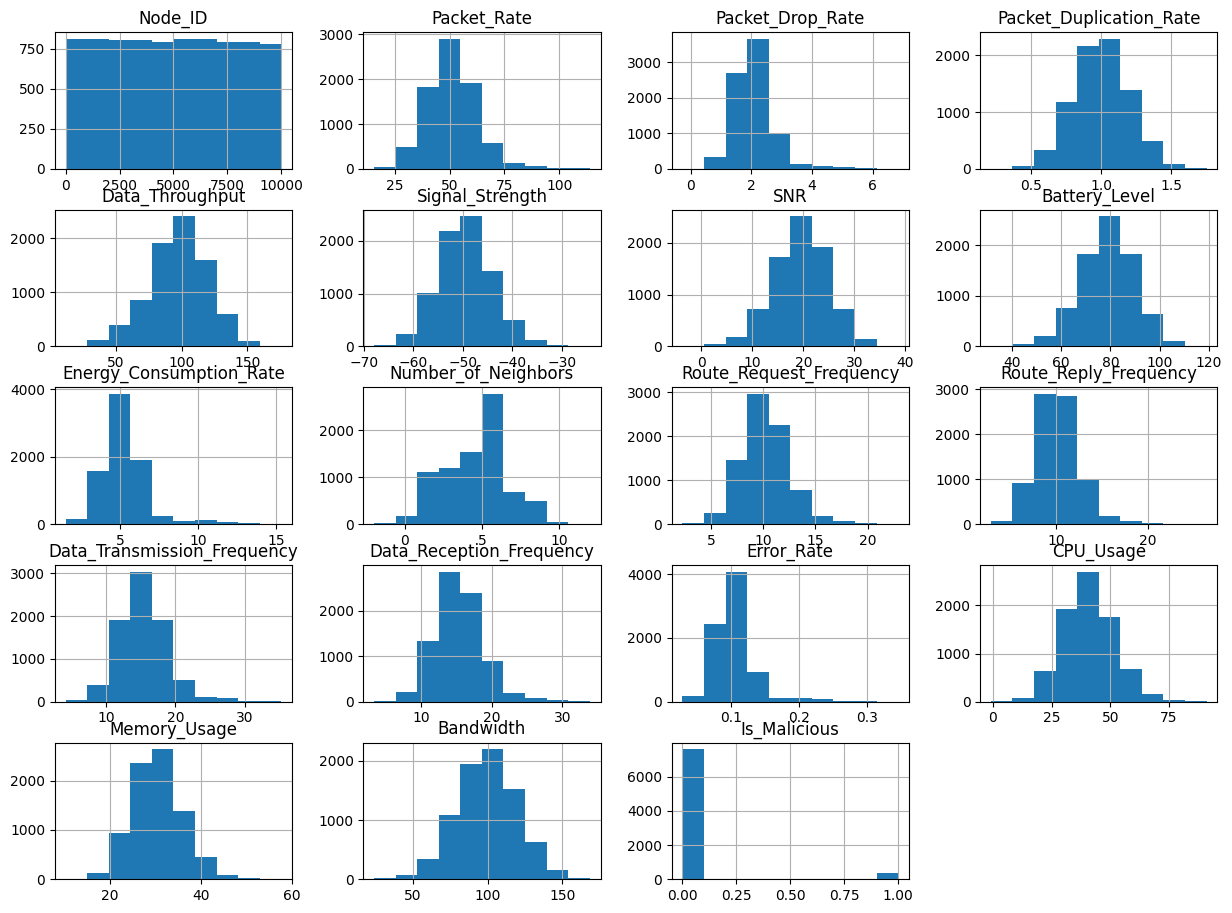

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
train_data = x_train.join(y_train)
print(train_data)
train_data.hist(figsize=(15,11))

<Axes: >

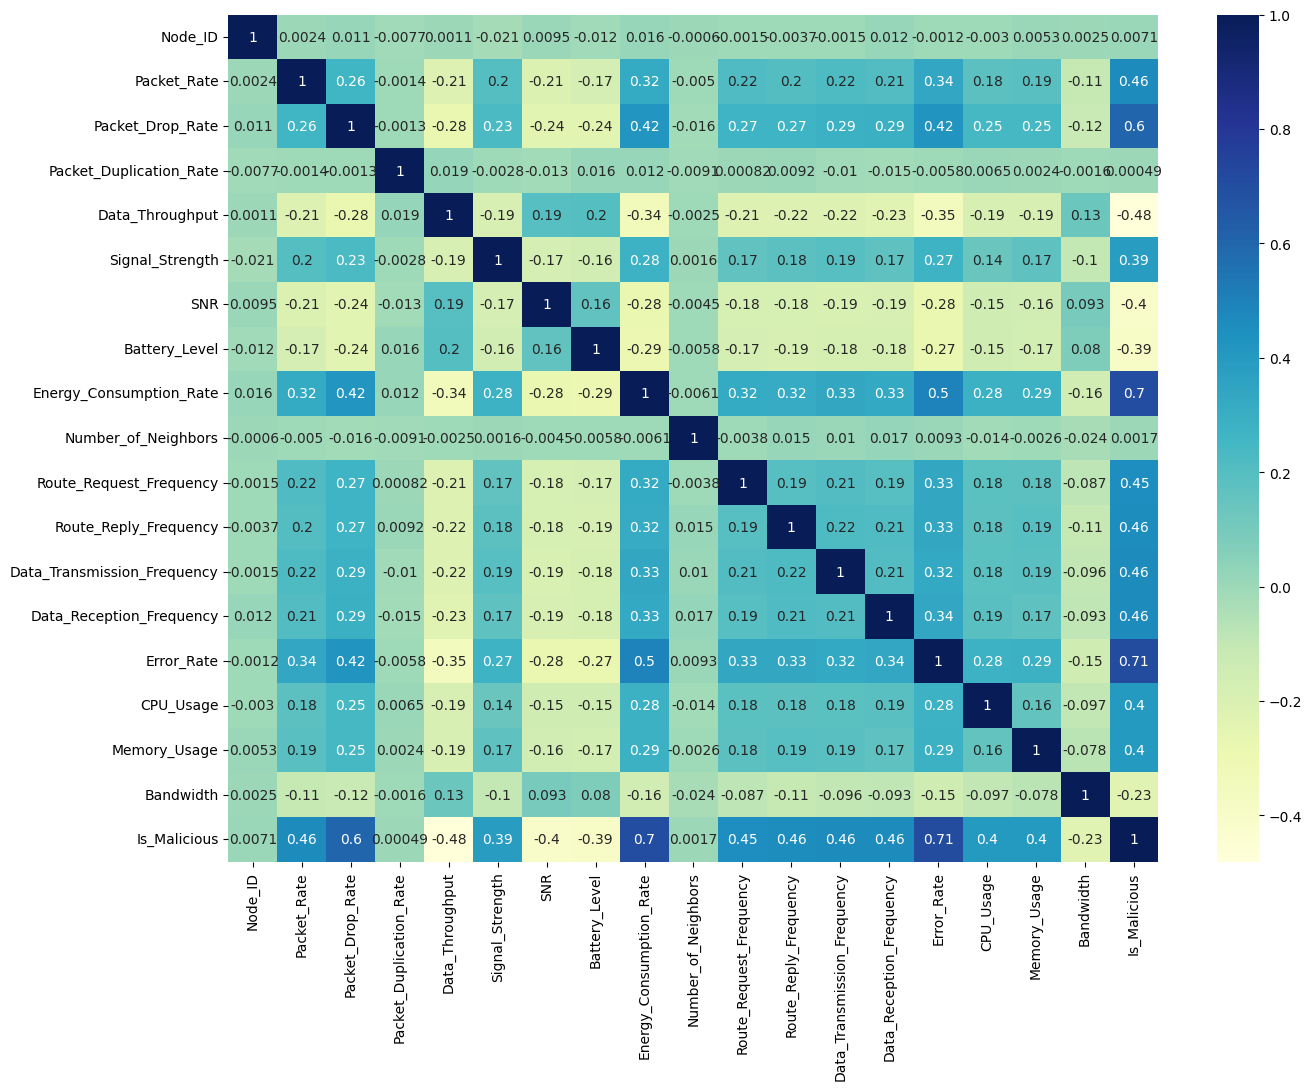

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,11))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [71]:
#LinearRegression
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['Is_Malicious'], axis = 1), train_data['Is_Malicious']
reg = LinearRegression()
reg.fit(x_train, y_train )

LinearRegression()

In [72]:
test_data = x_test.join(y_test)

In [73]:
test_data

,Node_ID,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,Energy_Consumption_Rate,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
3105,3106,52.488084,1.989701,0.950464,127.623824,-52.225977,21.477703,73.171355,5.540235,3,11.500866,8.691082,13.312332,15.518621,0.056088,32.804721,25.457870,104.247321,0
1918,1919,44.504481,2.465647,0.980603,84.841118,-60.865403,19.635510,75.020108,4.958211,6,6.955860,8.076240,15.459711,14.703415,0.104819,43.655656,23.701245,86.131847,0
3133,3134,64.622287,1.889868,0.658595,108.602505,-53.296453,20.635791,77.156514,7.397380,4,10.657255,6.724636,16.315902,18.342194,0.111555,26.627640,26.700482,103.905080,0
7553,7554,71.162957,3.264454,0.864214,108.709222,-51.141655,22.374953,76.694052,6.149733,5,9.348216,11.570656,17.136327,17.245106,0.122648,31.570366,30.384710,99.458056,0
2382,2383,37.205052,1.676108,0.847296,100.353738,-47.647753,20.506077,54.737757,6.746333,5,9.010097,9.756054,15.373261,11.144987,0.102647,33.519414,29.691434,96.946286,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,2543,47.836560,2.275371,1.383956,97.575017,-62.517813,18.267030,74.439033,3.762175,6,10.580622,10.316190,16.854406,20.850734,0.081841,30.075191,29.688112,89.635220,0
2850,2851,44.051359,1.429457,0.791276,113.197438,-53.432523,27.114880,82.952690,4.241357,7,13.380610,9.046780,16.896724,14.535481,0.124504,42.683414,33.393496,107.492581,0
9899,9900,37.101867,2.249554,0.935155,99.461256,-47.102680,22.205313,74.774831,5.008315,5,9.751216,9.266576,11.442494,10.618307,0.070507,31.885738,26.408746,110.459160,0
8438,8439,61.993204,1.128587,1.220770,82.501889,-51.590251,22.228499,69.093938,4.521917,8,14.470430,8.675400,14.448247,16.810002,0.106756,39.028901,26.652961,92.137994,0


In [77]:
x_test, y_test = test_data.drop(['Is_Malicious'], axis = 1), test_data['Is_Malicious']


In [82]:
reg.score(x_test,y_test)

0.8322153789627749

In [87]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [88]:
forest.score(x_test,y_test)

0.988405036726128

In [104]:
#Cross-Validation
from sklearn.model_selection import GridSearchCV
param_grid = {
   "n_estimators":[100,200,300],
   "min_samples_split":[2,4],
   #"n_estimators":[3,10,30],
   "max_features":[2,4,6,8]
}

grid_search = GridSearchCV(forest,param_grid, cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [101]:
best_forest = grid_search.best_estimator_

In [103]:
best_forest.score(x_test,y_test)

0.988314444507839